<a href="https://colab.research.google.com/github/RizalRio/py-data-analyst-game-sales/blob/main/Data_Analysis_Penjualan_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Baca dengan Pandas
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/designernatan/27da044c6dc823f7ac7fe3a01f4513ed/raw/d15b5c7d7a5efb38750b16ec935fc126ec9a6e79/vgsales.csv')

# Lihat 5 baris pertama
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
print("📊 Bentuk dataset:", df.shape)
print("\n📋 Kolom yang tersedia:", list(df.columns))
print("\n❓ Missing value:")
print(df.isnull().sum())
print("\n📈 Tipe ")
df.info()

📊 Bentuk dataset: (16598, 11)

📋 Kolom yang tersedia: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

❓ Missing value:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

📈 Tipe 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16

In [ ]:
# Hapus baris tanpa nama game atau tahun rilis
df_clean = df.dropna(subset=['Name', 'Year'])

# Pastikan Year itu integer (bukan float)
df_clean['Year'] = df_clean['Year'].astype(int)

# Filter hanya game dari tahun 2000 ke atas (lebih relevan)
df_recent = df_clean[df_clean['Year'] >= 2000]

print("Dataset setelah dibersihkan:", df_recent.shape)

Dataset setelah dibersihkan: (14353, 11)


/tmp/ipython-input-1433653234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Year'].astype(int)


In [ ]:
top_platform = df_recent.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_platform

,Global_Sales
Platform,
PS2,1233.46
X360,969.61
PS3,949.35
Wii,909.81
DS,818.94
GBA,313.56
PSP,291.71
PS4,278.10
XB,252.09


In [ ]:
top_genre = df_recent.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
top_genre

,Global_Sales
Genre,
Action,1532.41
Sports,1130.39
Shooter,897.46
Misc,725.63
Role-Playing,724.07
Racing,564.27
Platform,497.97
Simulation,337.60
Fighting,313.36


In [ ]:
top_publisher = df_recent.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_publisher

,Global_Sales
Publisher,
Nintendo,1184.95
Electronic Arts,1008.41
Activision,677.10
Ubisoft,465.19
Sony Computer Entertainment,435.55
Take-Two Interactive,389.45
THQ,320.73
Microsoft Game Studios,240.57
Konami Digital Entertainment,222.65


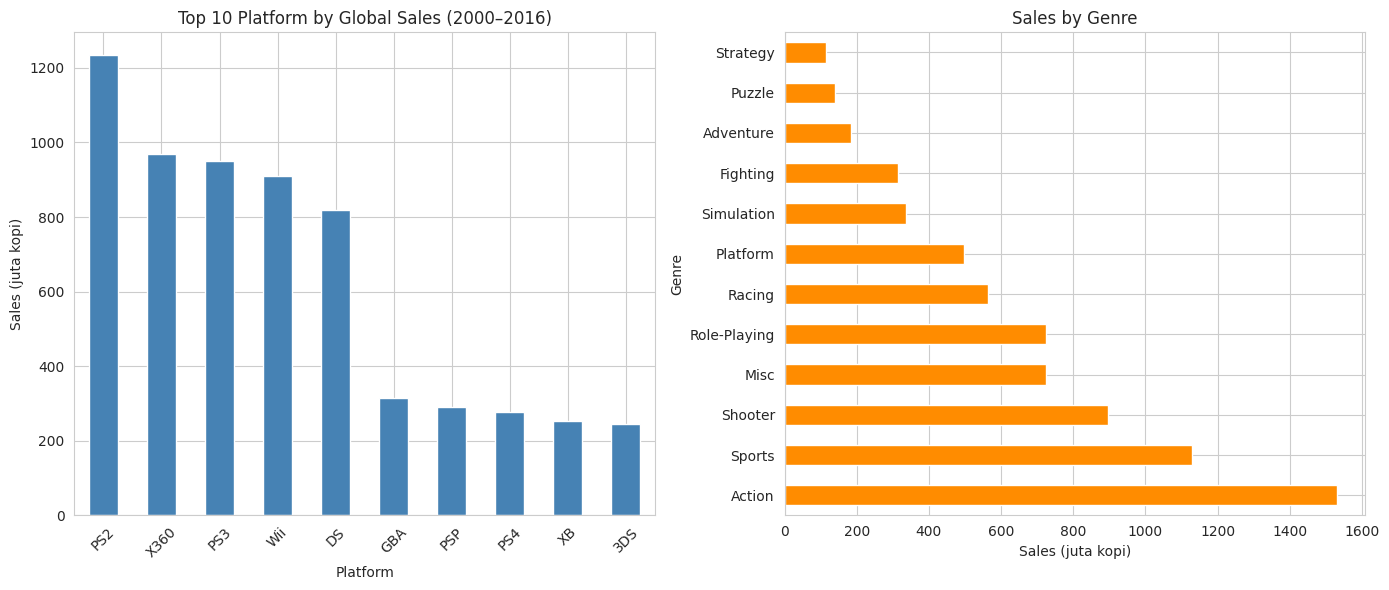

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set gaya visualisasi
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Plot 1: Top 10 Platform
plt.subplot(1, 2, 1)
top_platform.head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Platform by Global Sales (2000–2016)')
plt.ylabel('Sales (juta kopi)')
plt.xticks(rotation=45)

# Plot 2: Penjualan per Genre
plt.subplot(1, 2, 2)
top_genre.plot(kind='barh', color='darkorange')
plt.title('Sales by Genre')
plt.xlabel('Sales (juta kopi)')

plt.tight_layout()
plt.show()

In [ ]:
# Cari game "Call of Duty" atau "FIFA"
search = df_recent[df_recent['Name'].str.contains("FIFA", case=False, na=False)]
search[['Name', 'Platform', 'Year', 'Global_Sales']].head()

,Name,Platform,Year,Global_Sales
77,FIFA 16,PS4,2015,8.49
82,FIFA Soccer 13,PS3,2012,8.24
112,FIFA 14,PS3,2013,6.90
121,FIFA 12,PS3,2011,6.69
124,FIFA 15,PS4,2014,6.59


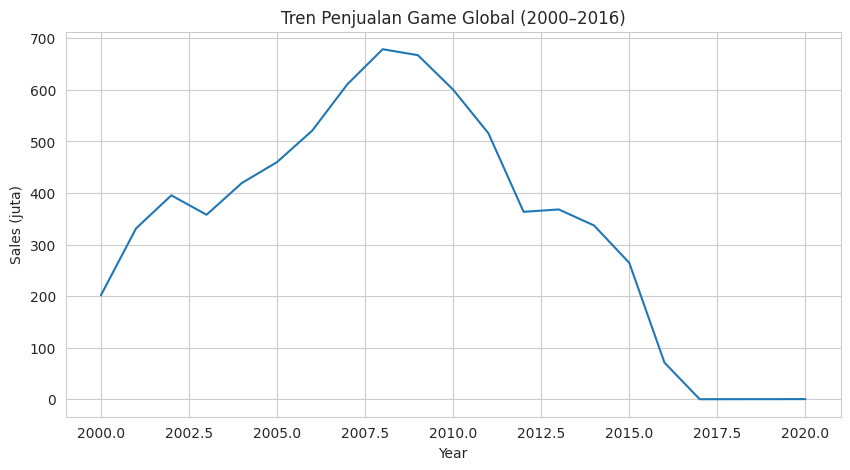

In [ ]:
yearly_sales = df_recent.groupby('Year')['Global_Sales'].sum()
yearly_sales.plot(kind='line', figsize=(10, 5), title='Tren Penjualan Game Global (2000–2016)')
plt.ylabel('Sales (juta)')
plt.show()

In [ ]:
top_platform_jp = df_recent[df_recent['Year'] >= 2010].groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).head(10)
top_platform_jp

,JP_Sales
Platform,
3DS,97.30
PS3,59.06
PSP,42.20
DS,27.90
PSV,20.89
Wii,17.75
PS4,14.30
WiiU,12.79
X360,5.46
